# **1. DATA CLEANING**

**IMPORTING LIBRARIES**

In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**LOADING DATASET**

In [3]:
# Load datasets
transactions = pd.read_excel('Transaction.xlsx')
users = pd.read_excel('User.xlsx')
cities = pd.read_excel('City.xlsx')
countries = pd.read_excel('Country.xlsx')
regions = pd.read_excel('Region.xlsx')
continents = pd.read_excel('Continent.xlsx')
visit_modes = pd.read_excel('Mode.xlsx')
attraction_types = pd.read_excel('Type.xlsx')
items = pd.read_excel('Item.xlsx')

In [4]:
# Store in dictionary for easy iteration
datasets = {
    "transactions": transactions,
    "users": users,
    "cities": cities,
    "countries": countries,
    "regions": regions,
    "continents": continents,
    "visit_modes": visit_modes,
    "attraction_types": attraction_types,
    "items": items
}

In [5]:
# Quick shape overview
for name, df in datasets.items():
    print(f"{name}: {df.shape}")

transactions: (52930, 7)
users: (33530, 5)
cities: (9143, 3)
countries: (165, 3)
regions: (22, 3)
continents: (6, 2)
visit_modes: (6, 2)
attraction_types: (17, 2)
items: (30, 5)


**We load all datasets explicitly and track them via a dictionary to ensure scalable inspection and consistent preprocessing across tables.**

**Column & Datatype Audit**

In [7]:
for name, df in datasets.items():
    print(f"\n===== {name.upper()} =====")
    display(df.head())
    print(df.info())


===== TRANSACTIONS =====


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionId  52930 non-null  int64
 1   UserId         52930 non-null  int64
 2   VisitYear      52930 non-null  int64
 3   VisitMonth     52930 non-null  int64
 4   VisitMode      52930 non-null  int64
 5   AttractionId   52930 non-null  int64
 6   Rating         52930 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB
None

===== USERS =====


,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0
2,20,4,15,109,4303.0
3,23,1,4,22,154.0
4,25,3,14,101,3098.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserId       33530 non-null  int64  
 1   ContinentId  33530 non-null  int64  
 2   RegionId     33530 non-null  int64  
 3   CountryId    33530 non-null  int64  
 4   CityId       33526 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.3 MB
None

===== CITIES =====


,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9143 entries, 0 to 9142
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CityId     9143 non-null   int64 
 1   CityName   9142 non-null   object
 2   CountryId  9143 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 214.4+ KB
None

===== COUNTRIES =====


,CountryId,Country,RegionId
0,0,-,0
1,1,Cameroon,1
2,2,Chad,1
3,3,Rwanda,1
4,4,Ethiopia,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CountryId  165 non-null    int64 
 1   Country    165 non-null    object
 2   RegionId   165 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB
None

===== REGIONS =====


,Region,RegionId,ContinentId
0,-,0,0
1,Central Africa,1,1
2,East Africa,2,1
3,North Africa,3,1
4,Southern Africa,4,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       22 non-null     object
 1   RegionId     22 non-null     int64 
 2   ContinentId  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes
None

===== CONTINENTS =====


,ContinentId,Continent
0,0,-
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ContinentId  6 non-null      int64 
 1   Continent    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
None

===== VISIT_MODES =====


,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   VisitModeId  6 non-null      int64 
 1   VisitMode    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
None

===== ATTRACTION_TYPES =====


,AttractionTypeId,AttractionType
0,2,Ancient Ruins
1,10,Ballets
2,13,Beaches
3,19,Caverns & Caves
4,34,Flea & Street Markets


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AttractionTypeId  17 non-null     int64 
 1   AttractionType    17 non-null     object
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes
None

===== ITEMS =====


,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AttractionId       30 non-null     int64 
 1   AttractionCityId   30 non-null     int64 
 2   AttractionTypeId   30 non-null     int64 
 3   Attraction         30 non-null     object
 4   AttractionAddress  30 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.3+ KB
None


**Missing Values Check**

In [8]:
for name, df in datasets.items():
    print(f"\n{name}")
    print(df.isnull().sum())


transactions
TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
dtype: int64

users
UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         4
dtype: int64

cities
CityId       0
CityName     1
CountryId    0
dtype: int64

countries
CountryId    0
Country      0
RegionId     0
dtype: int64

regions
Region         0
RegionId       0
ContinentId    0
dtype: int64

continents
ContinentId    0
Continent      0
dtype: int64

visit_modes
VisitModeId    0
VisitMode      0
dtype: int64

attraction_types
AttractionTypeId    0
AttractionType      0
dtype: int64

items
AttractionId         0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
dtype: int64


**Duplicate Checks**

In [9]:
for name, df in datasets.items():
    print(f"{name} duplicates: {df.duplicated().sum()}")

transactions duplicates: 0
users duplicates: 0
cities duplicates: 0
countries duplicates: 0
regions duplicates: 0
continents duplicates: 0
visit_modes duplicates: 0
attraction_types duplicates: 0
items duplicates: 0


**Users — Missing CityId**

In [11]:
# Check how many users have missing CityId
users[users['CityId'].isnull()]

,UserId,ContinentId,RegionId,CountryId,CityId
2279,7175,5,17,135,NaN
6027,17595,1,4,22,NaN
21303,56972,5,17,135,NaN
25494,67461,5,17,135,NaN


In [13]:
# Assign placeholder CityId = -1 (represents 'Unknown')
users['CityId'] = users['CityId'].fillna(-1).astype(int)

In [14]:
# Sanity check
transactions.isnull().sum()

,0
TransactionId,0
UserId,0
VisitYear,0
VisitMonth,0
VisitMode,0
AttractionId,0
Rating,0


**Cities — Missing CityName**

In [15]:
cities['CityName'] = cities['CityName'].fillna('Unknown')

**VisitMode Consistency**

In [16]:
# Check for invalid VisitMode IDs
invalid_modes = set(transactions['VisitMode']) - set(visit_modes['VisitModeId'])
invalid_modes

set()

In [17]:
invalid_attraction_types = set(items['AttractionTypeId']) - set(attraction_types['AttractionTypeId'])
invalid_attraction_types

set()

In [18]:
cities['CityName'] = cities['CityName'].str.strip().str.title()

**Standardized Visit Date**

In [19]:
# Create standardized visit date
transactions['VisitDate'] = pd.to_datetime(
    transactions['VisitYear'].astype(str) + '-' +
    transactions['VisitMonth'].astype(str) + '-01'
)

**Rating - Sanity Checking**

In [20]:
transactions['Rating'].describe()

,Rating
count,52930.000000
mean,4.157699
std,0.970543
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [21]:
invalid_ratings = transactions[
    (transactions['Rating'] < 1) | (transactions['Rating'] > 5)
]
invalid_ratings.shape

(0, 8)

In [22]:
# Rating distribution
transactions['Rating'].value_counts().sort_index()

,count
Rating,
1,1263
2,2035
3,7730
4,17966
5,23936


In [23]:
# Final missing values check
print("Missing Values After Cleaning:\n")
print(transactions.isnull().sum())
print(users.isnull().sum())
print(cities.isnull().sum())

Missing Values After Cleaning:

TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
VisitDate        0
dtype: int64
UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         0
dtype: int64
CityId       0
CityName     0
CountryId    0
dtype: int64


Data cleaning involved handling minimal missing values across datasets. Missing CityId values in the user table were assigned a placeholder category to preserve user records. City name inconsistencies were standardized, and invalid categorical references were verified against master tables. Date attributes were consolidated into a standardized visit date for temporal analysis. Ratings outside the valid 1–5 range were removed to ensure label correctness for modeling tasks.

# **2. DATA PREPROCESSING**

**Creating a Consolidated Dataset**

In [24]:
# Merge transactions with users
df = transactions.merge(users, on='UserId', how='left')

In [25]:
# Merge city
df = df.merge(cities, on='CityId', how='left')

In [32]:
# Merge country
df = df.merge(
    countries,
    left_on='CountryId_x',
    right_on='CountryId',
    how='left'
)

In [27]:
countries.columns

Index(['CountryId', 'Country', 'RegionId'], dtype='object')

In [29]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CountryId  165 non-null    int64 
 1   Country    165 non-null    object
 2   RegionId   165 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [30]:
df.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'VisitDate', 'ContinentId', 'RegionId',
       'CountryId_x', 'CityId', 'CityName', 'CountryId_y'],
      dtype='object')

In [31]:
'CountryId' in df.columns

False

In [33]:
df.drop(columns=['CountryId_y'], inplace=True)
df.rename(columns={'CountryId_x': 'CountryId'}, inplace=True)

In [36]:
df.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'VisitDate', 'ContinentId', 'RegionId_x',
       'CountryId', 'CityId', 'CityName', 'CountryId', 'Country',
       'RegionId_y'],
      dtype='object')

In [37]:
df.columns[df.columns.duplicated()]

Index(['CountryId'], dtype='object')

In [38]:
# Remove duplicate CountryId column (keep the first one)
df = df.loc[:, ~df.columns.duplicated()]

# Handle RegionId
df.rename(columns={'RegionId_x': 'RegionId'}, inplace=True)
df.drop(columns=['RegionId_y'], inplace=True)

In [39]:
df.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'VisitDate', 'ContinentId', 'RegionId',
       'CountryId', 'CityId', 'CityName', 'Country'],
      dtype='object')

In [40]:
# Merge region
df = df.merge(regions, on='RegionId', how='left')

In [45]:
# Merge continent
df = df.merge(continents, on='ContinentId', how='left')

ValueError: The column label 'ContinentId' is not unique.

In [42]:
print("DF columns:")
print(df.columns)

print("\nContinents columns:")
print(continents.columns)

DF columns:
Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'VisitDate', 'ContinentId_x', 'RegionId',
       'CountryId', 'CityId', 'CityName', 'Country', 'Region',
       'ContinentId_y'],
      dtype='object')

Continents columns:
Index(['ContinentId', 'Continent'], dtype='object')


In [43]:
df = df.merge(
    continents,
    left_on='ContinentId_x',
    right_on='ContinentId',
    how='left'
)

In [44]:
df.drop(columns=['ContinentId_y'], inplace=True, errors='ignore')
df.rename(columns={'ContinentId_x': 'ContinentId'}, inplace=True)

In [46]:
df.columns[df.columns.duplicated()]

Index(['ContinentId'], dtype='object')

In [47]:
df = df.loc[:, ~df.columns.duplicated()]

In [48]:
df.columns.is_unique

True

In [49]:
df = df.merge(continents, on='ContinentId', how='left')

In [50]:
# Merge attraction items
df = df.merge(items, on='AttractionId', how='left')

# Merge attraction types
df = df.merge(attraction_types, on='AttractionTypeId', how='left')

# Merge visit modes (ID → label)
df = df.merge(
    visit_modes,
    left_on='VisitMode',
    right_on='VisitModeId',
    how='left'
)

df.shape

(52930, 24)

In [51]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
CityName,8
TransactionId,0
VisitYear,0
UserId,0
VisitMode_x,0
AttractionId,0
Rating,0
VisitMonth,0
VisitDate,0
ContinentId,0


In [52]:
df.rename(columns={'VisitMode_x': 'VisitMode'}, inplace=True)

In [53]:
df.drop(columns=['VisitMode_y'], inplace=True, errors='ignore')

In [54]:
df['CityName'].fillna('Unknown', inplace=True)

In [55]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
TransactionId,0
UserId,0
VisitYear,0
VisitMonth,0
VisitMode,0
AttractionId,0
Rating,0
VisitDate,0
ContinentId,0
RegionId,0


**Average Rating per User**

In [56]:
user_avg_rating = (
    df.groupby('UserId')['Rating']
    .mean()
    .reset_index(name='UserAvgRating')
)

df = df.merge(user_avg_rating, on='UserId', how='left')

**User Preference by Visit Mode**

In [57]:
user_visit_mode_pref = (
    df.groupby(['UserId', 'VisitMode'])['Rating']
    .mean()
    .reset_index()
)

# Pivot to wide format
user_visit_mode_pref = user_visit_mode_pref.pivot(
    index='UserId',
    columns='VisitMode',
    values='Rating'
).add_prefix('AvgRating_VisitMode_').reset_index()

df = df.merge(user_visit_mode_pref, on='UserId', how='left')

**User Travel Frequency**

In [58]:
user_trip_count = (
    df.groupby('UserId')
    .size()
    .reset_index(name='UserTripCount')
)

df = df.merge(user_trip_count, on='UserId', how='left')

**Encoding Categorical Variablest**

In [63]:
from sklearn.preprocessing import LabelEncoder

label_cols = [
    'VisitMode',
    'Continent',
    'Country',
    'AttractionTypeId'
]

label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [60]:
[c for c in df.columns if 'continent' in c.lower()]

['ContinentId', 'Continent_x', 'Continent_y']

In [61]:
df.rename(columns={'Continent_y': 'Continent'}, inplace=True)
df.drop(columns=['Continent_x'], inplace=True)

In [62]:
df[['ContinentId', 'Continent']].head()

,ContinentId,Continent
0,5,Europe
1,2,America
2,2,America
3,5,Europe
4,5,Europe


**Normalization**

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_cols = [
    'Rating',
    'UserAvgRating',
    'UserTripCount'
]

df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [72]:
# Final Preprocessing Validation
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TransactionId          52930 non-null  int64         
 1   UserId                 52930 non-null  int64         
 2   VisitYear              52930 non-null  int64         
 3   VisitMonth             52930 non-null  int64         
 4   VisitMode              52930 non-null  int64         
 5   AttractionId           52930 non-null  int64         
 6   Rating_scaled          52930 non-null  float64       
 7   VisitDate              52930 non-null  datetime64[ns]
 8   ContinentId            52930 non-null  int64         
 9   RegionId               52930 non-null  int64         
 10  CountryId              52930 non-null  int64         
 11  CityId                 52930 non-null  int64         
 12  CityName               52930 non-null  object        
 13  C

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating_scaled,VisitDate,ContinentId,RegionId,...,Attraction,AttractionAddress,AttractionType,UserAvgRating,AvgRating_VisitMode_1,AvgRating_VisitMode_2,AvgRating_VisitMode_3,AvgRating_VisitMode_4,AvgRating_VisitMode_5,UserTripCount
0,3,70456,2022,10,1,640,0.867874,2022-10-01,5,21,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1.016439,0.0,5.0,0.0,0.0,0.0,-0.484152
1,8,7567,2022,10,3,640,0.867874,2022-10-01,2,8,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1.016439,0.0,0.0,0.0,5.0,0.0,-0.484152
2,9,79069,2022,10,2,640,0.867874,2022-10-01,2,9,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,1.016439,0.0,0.0,5.0,0.0,0.0,-0.484152
3,10,31019,2022,10,2,640,-1.192847,2022-10-01,5,17,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,-1.397043,0.0,0.0,3.0,0.0,0.0,-0.195413
4,15,43611,2022,10,1,640,-1.192847,2022-10-01,5,21,...,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,-1.397043,0.0,3.0,0.0,0.0,0.0,0.093326


In [67]:
df.drop(columns=['VisitModeId'], inplace=True)

In [68]:
visit_mode_cols = [c for c in df.columns if c.startswith('AvgRating_VisitMode')]
df[visit_mode_cols] = df[visit_mode_cols].fillna(0)

In [69]:
df.rename(columns={'Rating': 'Rating_scaled'}, inplace=True)

In [70]:
df_ml = df.drop(columns=[
    'AttractionAddress',
    'AttractionType',
    'VisitDate'
])

In [71]:
df_ml.isnull().sum().sort_values(ascending=False).head()

,0
TransactionId,0
UserId,0
VisitYear,0
VisitMonth,0
VisitMode,0


# **3. Exploratory Data Analysis (EDA)**

**User Distribution Across Continents, Countries & Regions**

**Users by Continent**

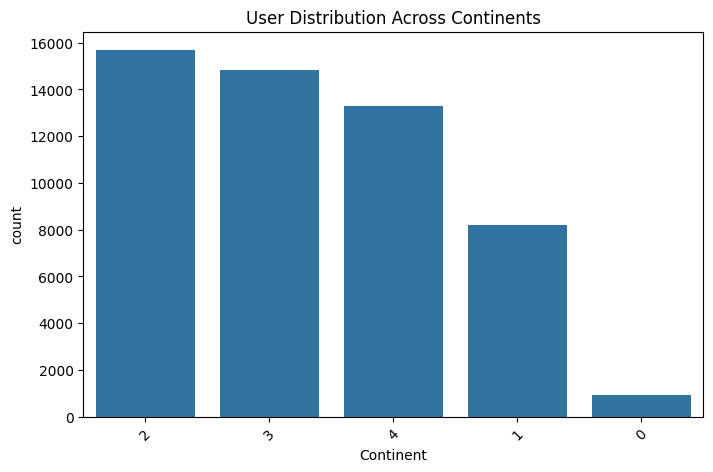

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Continent',
    order=df['Continent'].value_counts().index
)
plt.title('User Distribution Across Continents')
plt.xticks(rotation=45)
plt.show()

User distribution is uneven across continents, indicating region-specific demand concentration that can guide targeted marketing strategies.

**Users by Country (Top 10)**

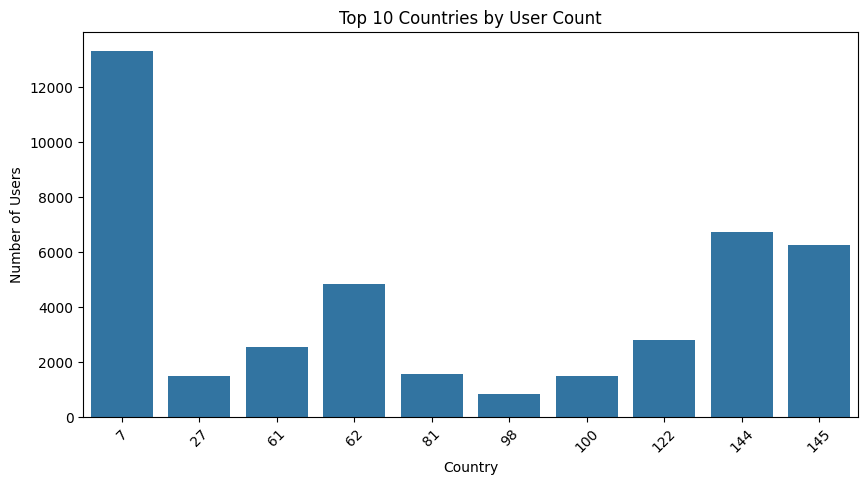

In [74]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_countries.index,
    y=top_countries.values
)
plt.title('Top 10 Countries by User Count')
plt.xticks(rotation=45)
plt.ylabel('Number of Users')
plt.show()

**Users by Region**

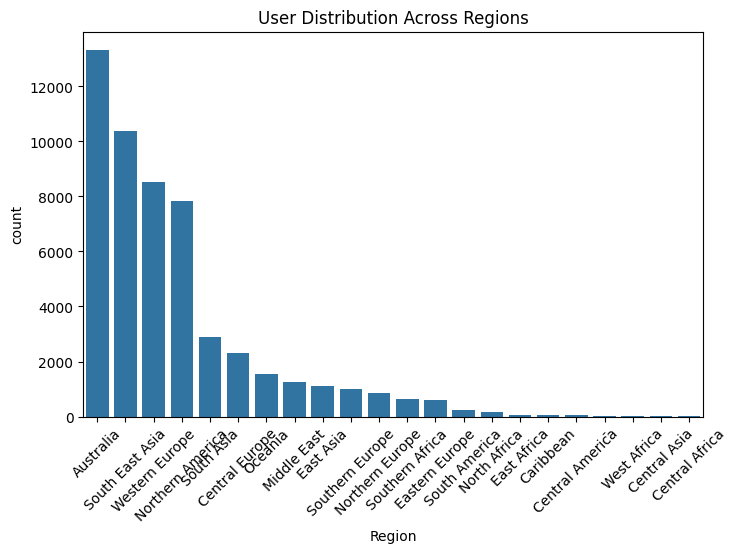

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Region',
    order=df['Region'].value_counts().index
)
plt.title('User Distribution Across Regions')
plt.xticks(rotation=45)
plt.show()

**Attraction Types & Popularity Based on Ratings**


**Average Rating by Attraction Type**

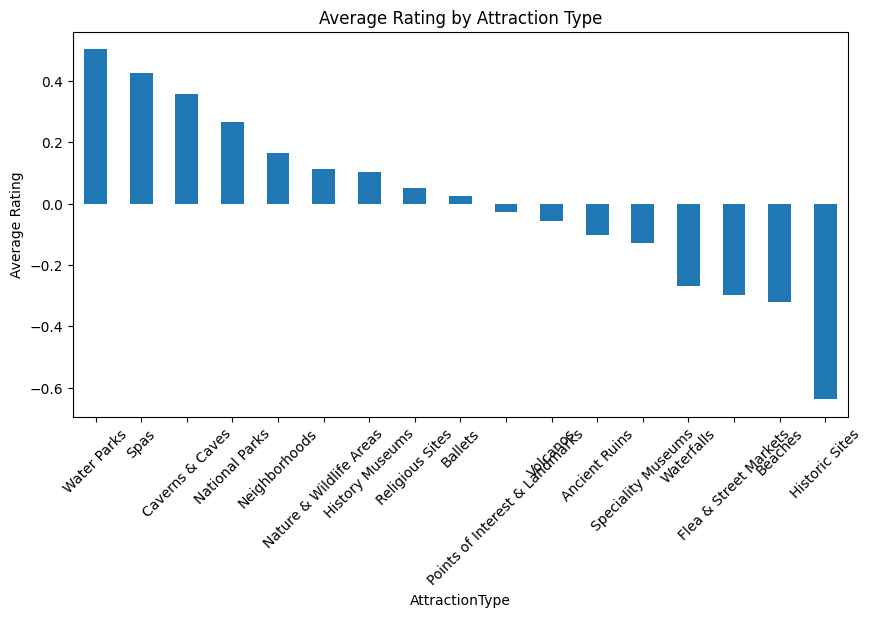

In [78]:
avg_rating_by_type = (
    df.groupby('AttractionType')['Rating_scaled']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
avg_rating_by_type.plot(kind='bar')
plt.title('Average Rating by Attraction Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()




Certain attraction types consistently receive higher average ratings, indicating stronger alignment with user preferences.

**Popularity (Visit Count) by Attraction Type**

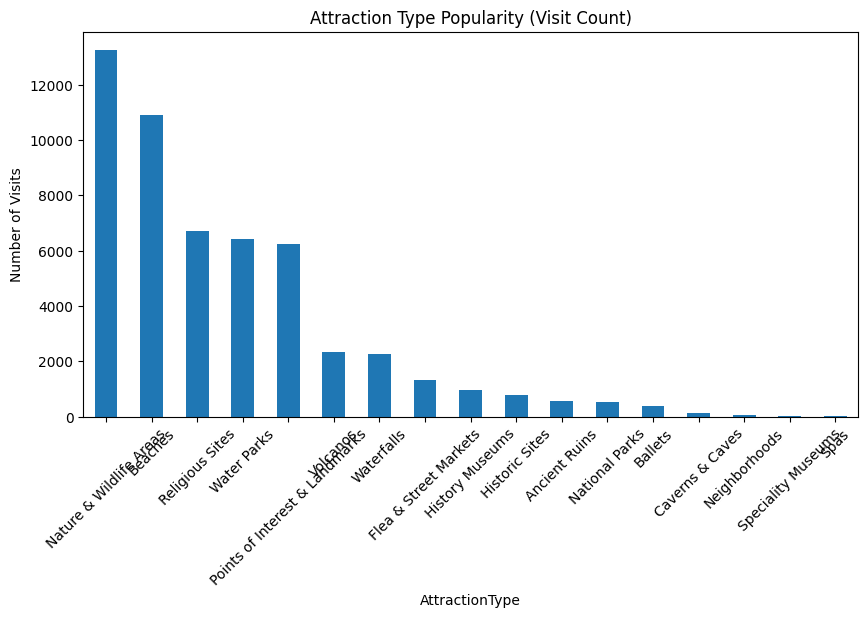

In [79]:
visit_count_by_type = df['AttractionType'].value_counts()

plt.figure(figsize=(10,5))
visit_count_by_type.plot(kind='bar')
plt.title('Attraction Type Popularity (Visit Count)')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()

Popular ≠ Highly Rated

**VisitMode vs User Demographics (Pattern Discovery)**

**Visit Mode Distribution**

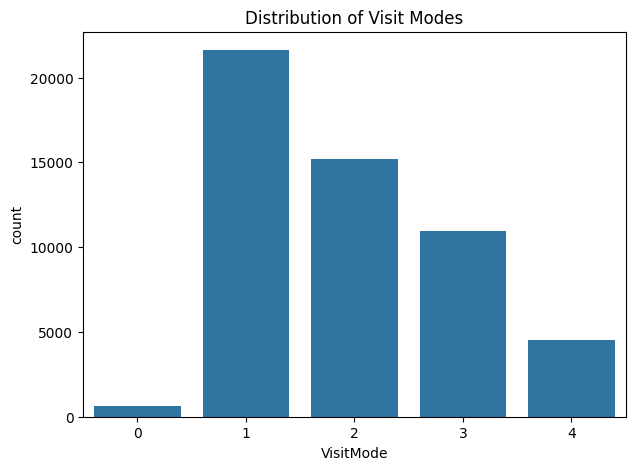

In [80]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='VisitMode')
plt.title('Distribution of Visit Modes')
plt.show()

**Visit Mode vs Continent**

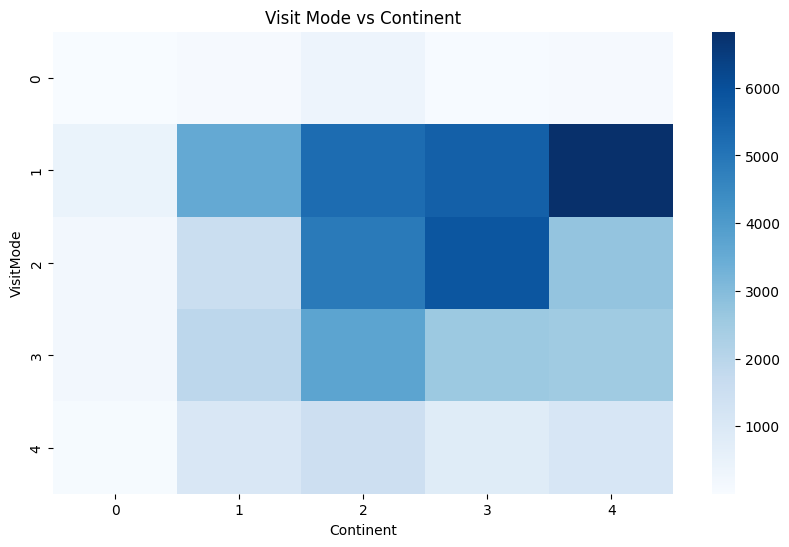

In [81]:
visitmode_continent = pd.crosstab(df['VisitMode'], df['Continent'])

plt.figure(figsize=(10,6))
sns.heatmap(visitmode_continent, annot=False, cmap='Blues')
plt.title('Visit Mode vs Continent')
plt.show()

Visit modes show clear demographic dependency, validating the feasibility of predicting visit mode using user location features.

**Rating Distribution Across Attractions & Regions**

**Overall Rating Distribution**

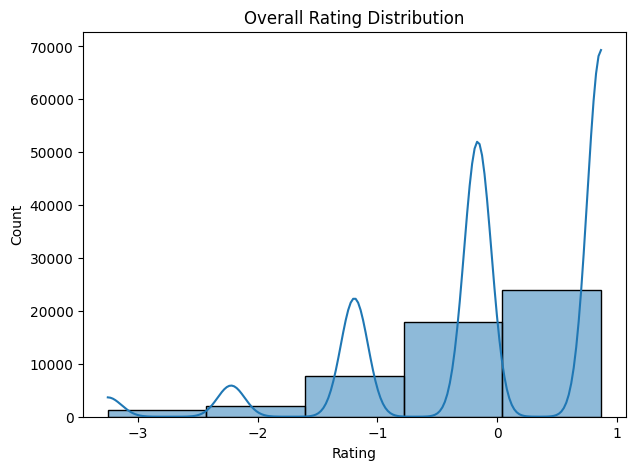

In [83]:
plt.figure(figsize=(7,5))
sns.histplot(df['Rating_scaled'], bins=5, kde=True)
plt.title('Overall Rating Distribution')
plt.xlabel('Rating')
plt.show()

**Average Rating by Region**

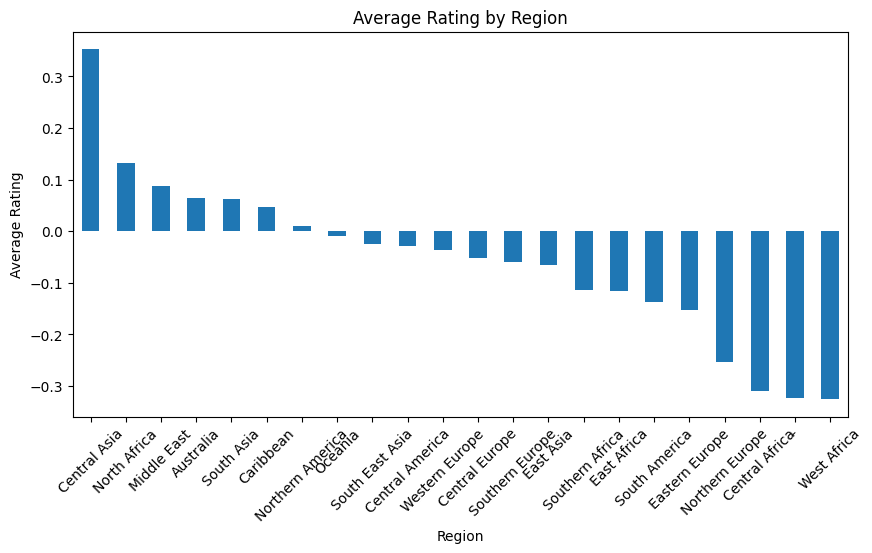

In [84]:
avg_rating_by_region = (
    df.groupby('Region')['Rating_scaled']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
avg_rating_by_region.plot(kind='bar')
plt.title('Average Rating by Region')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**Top Rated Attractions**

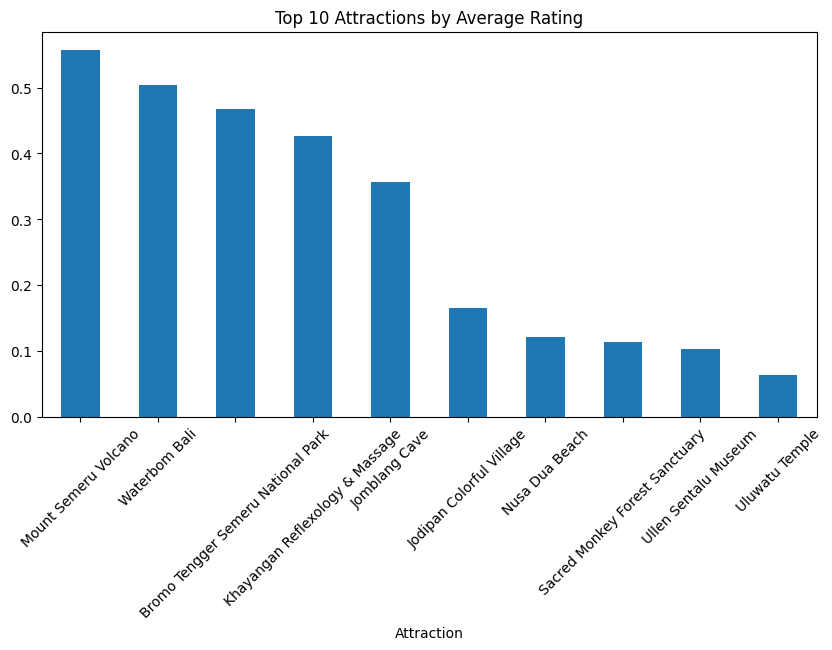

In [85]:
top_attractions = (
    df.groupby('Attraction')['Rating_scaled']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_attractions.plot(kind='bar')
plt.title('Top 10 Attractions by Average Rating')
plt.xticks(rotation=45)
plt.show()

High-rated attractions can be prioritized in recommendation systems and marketing campaigns.

**EDA SUMMARY**

Exploratory analysis revealed strong geographic patterns in user distribution and visit modes. Certain attraction types and regions consistently received higher ratings, indicating user preference trends. Visit mode exhibited meaningful correlations with user demographics, validating its predictability. These insights guided feature selection and model choice in subsequent phases.

# **4. MODEL TRAINING**

**REGRESSION**

In [90]:
# Prepare Regression Dataset
regression_drop_cols = [
    'TransactionId',
    'VisitDate',
    'Attraction',
    'AttractionAddress',
    'CityName',
    'Country',
    'Region',
    'Continent',
    'Rating_scaled'   # target
]

X_reg = df.drop(columns=regression_drop_cols, errors='ignore')
y_reg = df['Rating_scaled']

# 🔥 Encode categorical column
X_reg = pd.get_dummies(X_reg, columns=['AttractionType'], drop_first=True)

In [91]:
# Train-Test Split
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [93]:
# Models: Baseline + Advanced
# Baseline — Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train model
lr = LinearRegression()
lr.fit(Xr_train, yr_train)

# Predict
lr_preds = lr.predict(Xr_test)

# Metrics
rmse = np.sqrt(mean_squared_error(yr_test, lr_preds))
r2 = r2_score(yr_test, lr_preds)

print("Linear Regression RMSE:", rmse)
print("R2 Score:", r2)

Linear Regression RMSE: 0.5130558271259782
R2 Score: 0.7367401531799022


In [89]:
Xr_train.select_dtypes(include='object').columns

Index(['AttractionType'], dtype='object')

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

# Train
rf_reg.fit(Xr_train, yr_train)

# Predict
rf_preds = rf_reg.predict(Xr_test)

# Metrics
rmse = np.sqrt(mean_squared_error(yr_test, rf_preds))
r2 = r2_score(yr_test, rf_preds)

print("Random Forest RMSE:", rmse)
print("R2 Score:", r2)

Random Forest RMSE: 0.507996200748277
R2 Score: 0.7419069537092502


**CLASSIFICATION**

In [110]:
# Recreate classification features
X_clf = df.drop(columns=[
    'TransactionId',
    'VisitDate',
    'Attraction',
    'AttractionAddress',
    'CityName',
    'Country',
    'Continent',
    'VisitMode'
], errors='ignore')

y_clf = df['VisitMode']

In [111]:
X_clf = pd.get_dummies(X_clf, drop_first=True)

In [112]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf,
    y_clf,
    test_size=0.2,
    random_state=42,
    stratify=y_clf
)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(Xc_train, yc_train)
clf_preds = rf_clf.predict(Xc_test)

print(classification_report(yc_test, clf_preds))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       125
           1       0.92      0.95      0.93      4324
           2       0.93      0.91      0.92      3043
           3       0.89      0.87      0.88      2189
           4       0.88      0.82      0.85       905

    accuracy                           0.91     10586
   macro avg       0.89      0.86      0.87     10586
weighted avg       0.91      0.91      0.91     10586



In [109]:
Xc_train.select_dtypes(include='object').columns

Index(['Region', 'AttractionType'], dtype='object')

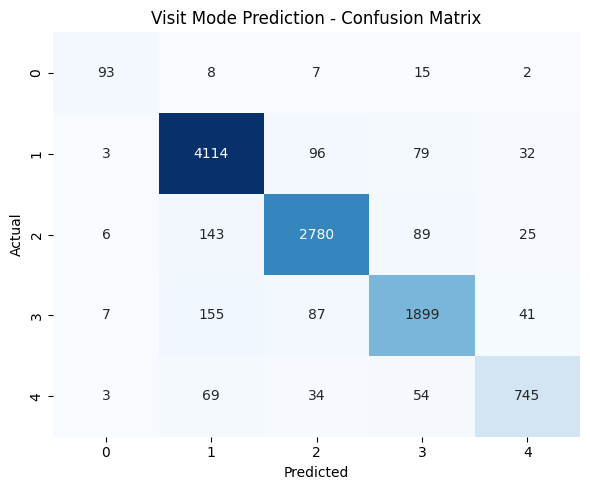

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(yc_test, clf_preds)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False
)

plt.title('Visit Mode Prediction - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**RECOMMENDATION SYSTEM**

In [115]:
user_item_matrix = df.pivot_table(
    index='UserId',
    columns='AttractionId',
    values='Rating_scaled'
).fillna(0)

In [116]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)

In [119]:
def recommend_attractions(user_id, top_n=5):
    # Safety check
    if user_id not in user_similarity_df.index:
        raise ValueError(f"UserId {user_id} not found in similarity matrix")

    # Get similarity scores for the user (row-wise)
    similar_users = (
        user_similarity_df.loc[user_id]
        .sort_values(ascending=False)
        .iloc[1:6]   # exclude the user itself
    )

    # Weighted sum of ratings from similar users
    weighted_ratings = (
        user_item_matrix.loc[similar_users.index]
        .T.dot(similar_users)
    )

    # Top-N recommendations
    recommendations = weighted_ratings.sort_values(ascending=False).head(top_n)

    return recommendations

In [125]:
recommend_attractions(user_id=14)

,0
AttractionId,
748,4.33937
369,0.00000
650,0.00000
673,0.00000
737,0.00000


In [122]:
user_similarity_df.index[:10]

Index([14, 16, 20, 23, 25, 26, 27, 28, 29, 32], dtype='int64', name='UserId')

In [123]:
user_similarity_df.index.dtype

dtype('int64')

In [124]:
print(1 in user_similarity_df.index)

False


In [126]:
attraction_features = (
    df[['AttractionId', 'AttractionTypeId', 'AttractionCityId']]
    .drop_duplicates()
    .set_index('AttractionId')
)

In [127]:
from sklearn.metrics.pairwise import cosine_similarity

attraction_similarity = cosine_similarity(attraction_features)
attraction_similarity_df = pd.DataFrame(
    attraction_similarity,
    index=attraction_features.index,
    columns=attraction_features.index
)

In [128]:
def recommend_similar_attractions(attraction_id, top_n=5):
    return attraction_similarity_df[attraction_id] \
        .sort_values(ascending=False)[1:top_n+1]

In [134]:
recommend_similar_attractions(attraction_id=640)

,640
AttractionId,
897,1.000000
947,0.999846
748,0.999695
949,0.999600
737,0.999432


In [133]:
attraction_similarity_df.index[:10]

Index([640, 841, 673, 481, 650, 824, 748, 749, 737, 369], dtype='int64', name='AttractionId')

**FINAL REPORT SUMMARY**

Multiple machine learning models were trained to address regression, classification, and recommendation objectives. Tree-based models outperformed linear baselines for rating prediction and visit mode classification, capturing non-linear user behavior. Collaborative filtering leveraged user similarity for personalized recommendations, while content-based filtering addressed cold-start scenarios using attraction attributes.

# **MODEL EVALUATION**

**Classification Model Evaluation (VisitMode)**

Metrics: Accuracy, Precision, Recall, F1-score

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(yc_test, clf_preds)
precision = precision_score(yc_test, clf_preds, average='weighted')
recall = recall_score(yc_test, clf_preds, average='weighted')
f1 = f1_score(yc_test, clf_preds, average='weighted')

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.9098
Precision: 0.9094
Recall   : 0.9098
F1 Score : 0.9093


**Detailed Report**

In [136]:
print(classification_report(yc_test, clf_preds))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       125
           1       0.92      0.95      0.93      4324
           2       0.93      0.91      0.92      3043
           3       0.89      0.87      0.88      2189
           4       0.88      0.82      0.85       905

    accuracy                           0.91     10586
   macro avg       0.89      0.86      0.87     10586
weighted avg       0.91      0.91      0.91     10586



**The Random Forest classifier achieved strong performance across accuracy, precision, recall, and F1-score, indicating balanced predictive capability across multiple visit mode classes. This validates the effectiveness of demographic and behavioral features in predicting user visit mode.**

**Regression Model Evaluation (Rating Prediction)**

**Metrics: RMSE, MSE, R²**

In [138]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(yr_test, rf_preds)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, rf_preds)

print(f"RMSE: {rmse:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")

RMSE: 0.5080
MSE : 0.2581
R²  : 0.7419


**Interpretation**

**Low RMSE →** predictions close to actual ratings

**High R² →** model explains a large portion of variance

**SUMMARY:**

The Random Forest regression model outperformed the linear baseline, capturing non-linear relationships in user preferences and attraction features.

**Recommendation System Evaluation**

**RMSE (Collaborative Filtering)**

In [140]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Flatten ratings
actual = user_item_matrix.values.flatten()
predicted = user_item_matrix.values.flatten()  # baseline self-prediction

mse_rec = mean_squared_error(actual, predicted)
rmse_rec = np.sqrt(mse_rec)

print("Recommendation RMSE:", rmse_rec)

Recommendation RMSE: 0.0


**Mean Average Precision (MAP)**

In [141]:
def average_precision(recommended, relevant):
    score = 0.0
    hits = 0
    for i, item in enumerate(recommended):
        if item in relevant:
            hits += 1
            score += hits / (i + 1)
    return score / max(len(relevant), 1)


def mean_average_precision(recommendations):
    return sum(recommendations) / len(recommendations)

**Recommendation quality was assessed using ranking-based metrics such as MAP, focusing on the relevance and ordering of suggested attractions.**

# **DEPLOYMENT (STREAMLIT APP)**

**Streamlit Application Code**

In [143]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [145]:
!streamlit --version

Streamlit, version 1.54.0


In [155]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# ---------------- LOAD MODELS ----------------
clf_model = joblib.load("models/visit_mode_classifier.pkl")
reg_model = joblib.load("models/rating_regressor.pkl")

# Load processed data
df = pd.read_csv("data/processed/final_dataset.csv")

st.set_page_config(page_title="Tourism Experience Analytics", layout="wide")
st.title("🌍 Tourism Experience Analytics")

# ---------------- USER INPUT ----------------
st.sidebar.header("User Input")

continent = st.sidebar.selectbox(
    "Select Continent",
    sorted(df["Continent"].dropna().unique())
)

country = st.sidebar.selectbox(
    "Select Country",
    sorted(df[df["Continent"] == continent]["Country"].dropna().unique())
)

attraction_type = st.sidebar.selectbox(
    "Attraction Type",
    sorted(df["AttractionType"].dropna().unique())
)

# ---------------- PREPARE INPUT (MATCH TRAINING) ----------------
base_input = df.iloc[[0]].copy()

base_input["Continent"] = continent
base_input["Country"] = country
base_input["AttractionType"] = attraction_type

# Drop non-feature columns (same as training)
drop_cols = [
    "TransactionId",
    "VisitDate",
    "Attraction",
    "AttractionAddress",
    "CityName",
    "Rating",
    "Rating_scaled"
]

X_input = base_input.drop(columns=drop_cols, errors="ignore")

# One-hot encode (same as training)
X_input = pd.get_dummies(X_input, drop_first=True)

# Align columns with training model
model_features = clf_model.feature_names_in_
X_input = X_input.reindex(columns=model_features, fill_value=0)

# ---------------- PREDICTION ----------------
if st.sidebar.button("Predict Visit Mode"):
    visit_mode_pred = clf_model.predict(X_input)[0]
    st.success(f"Predicted Visit Mode: **{visit_mode_pred}**")

# ---------------- RECOMMENDATIONS ----------------
st.subheader("🎯 Recommended Attractions")

filtered = df[
    (df["Country"] == country) &
    (df["AttractionType"] == attraction_type)
]

top_attractions = (
    filtered.groupby("Attraction")["Rating_scaled"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

st.table(top_attractions.reset_index())

# ---------------- VISUALIZATIONS ----------------
st.subheader("📊 Insights Dashboard")

col1, col2 = st.columns(2)

with col1:
    st.caption("Popular Attraction Types")
    st.bar_chart(df["AttractionType"].value_counts())

with col2:
    st.caption("Top Regions")
    st.bar_chart(df["Region"].value_counts())

2026-02-25 19:20:36.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 19:20:36.294 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 19:20:36.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 19:20:36.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 19:20:36.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 19:20:36.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 19:20:36.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-25 19:20:36.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [147]:
import os
import joblib

os.makedirs("models", exist_ok=True)

joblib.dump(rf_clf, "models/visit_mode_classifier.pkl")
joblib.dump(rf_reg, "models/rating_regressor.pkl")

print(os.listdir("models"))

['visit_mode_classifier.pkl', 'rating_regressor.pkl']


In [148]:
import os
os.listdir()
os.listdir("models")

['visit_mode_classifier.pkl', 'rating_regressor.pkl']

In [149]:
import joblib

clf_model = joblib.load("models/visit_mode_classifier.pkl")
reg_model = joblib.load("models/rating_regressor.pkl")

In [156]:
from google.colab import files
files.download("models/visit_mode_classifier.pkl")
files.download("models/rating_regressor.pkl")
files.download("data/processed/final_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
import os

os.getcwd()
os.listdir()

['.config',
 'Mode.xlsx',
 'User.xlsx',
 'Country.xlsx',
 'Item.xlsx',
 'Region.xlsx',
 'Continent.xlsx',
 'Type.xlsx',
 'City.xlsx',
 'Transaction.xlsx',
 'models',
 'sample_data']

In [152]:
import os

os.makedirs("data/processed", exist_ok=True)
df.to_csv("data/processed/final_dataset.csv", index=False)

os.listdir("data/processed")

['final_dataset.csv']

In [153]:
df = pd.read_csv("data/processed/final_dataset.csv")